In [1]:
import numpy as np
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
from numpy.random import seed
seed(1)

In [3]:
dataset=pd.read_csv("Data/testset.csv")
dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.00,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.00,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.20,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99565,20161231-12:00,Partly Cloudy,15.0,0,0,NaN,77.0,NaN,1015.0,0,0,18.0,0,0,0.50,110.0,ESE,NaN,NaN,7.4
99566,20161231-13:00,Partly Cloudy,16.0,0,0,NaN,100.0,NaN,1014.0,0,0,16.0,0,0,0.80,90.0,East,NaN,NaN,3.7
99567,20161231-15:00,NaN,13.0,0,0,NaN,NaN,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,NaN,NaN,59.3
99568,20161231-18:00,Patches of Fog,12.0,1,0,NaN,100.0,NaN,1016.0,0,0,12.0,0,0,0.50,NaN,NaN,NaN,NaN,0.0


In [4]:
dataset.columns=dataset.columns.str.replace("_","")
dataset.columns=dataset.columns.str.replace(" ","")
dataset.columns

Index(['datetimeutc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [5]:
dataset.drop(columns=["conds","dewptm","fog","hail","heatindexm","precipm","rain","snow","thunder","tornado","vism","wdird","wdire","wgustm","windchillm"],inplace=True,axis=1)
dataset

,datetimeutc,hum,pressurem,tempm,wspdm
0,19961101-11:00,27.0,1010.0,30.0,7.4
1,19961101-12:00,32.0,-9999.0,28.0,NaN
2,19961101-13:00,44.0,-9999.0,24.0,NaN
3,19961101-14:00,41.0,1010.0,24.0,NaN
4,19961101-16:00,47.0,1011.0,23.0,0.0
...,...,...,...,...,...
99565,20161231-12:00,77.0,1015.0,18.0,7.4
99566,20161231-13:00,100.0,1014.0,16.0,3.7
99567,20161231-15:00,NaN,1016.0,NaN,59.3
99568,20161231-18:00,100.0,1016.0,12.0,0.0


In [6]:
dataset['pressurem'].replace('-9999.0',np.nan)
dataset.replace(0,np.nan)
dataset.isnull().sum()

datetimeutc       0
hum             756
pressurem       232
tempm           672
wspdm          2358
dtype: int64

In [7]:
dataset

,datetimeutc,hum,pressurem,tempm,wspdm
0,19961101-11:00,27.0,1010.0,30.0,7.4
1,19961101-12:00,32.0,-9999.0,28.0,NaN
2,19961101-13:00,44.0,-9999.0,24.0,NaN
3,19961101-14:00,41.0,1010.0,24.0,NaN
4,19961101-16:00,47.0,1011.0,23.0,0.0
...,...,...,...,...,...
99565,20161231-12:00,77.0,1015.0,18.0,7.4
99566,20161231-13:00,100.0,1014.0,16.0,3.7
99567,20161231-15:00,NaN,1016.0,NaN,59.3
99568,20161231-18:00,100.0,1016.0,12.0,0.0


In [8]:
hum_median=dataset["hum"].median()
dataset["hum"].fillna(hum_median,inplace=True)
pressurem_median=dataset["pressurem"].median()
dataset["pressurem"].fillna(pressurem_median,inplace=True)
wspdm_median=dataset["wspdm"].median()
dataset["wspdm"].fillna(wspdm_median,inplace=True)
tempm_median=dataset["tempm"].median()
dataset["tempm"].fillna(tempm_median,inplace=True)

In [9]:
dataset.isnull().sum()

datetimeutc    0
hum            0
pressurem      0
tempm          0
wspdm          0
dtype: int64

In [10]:
dataset

,datetimeutc,hum,pressurem,tempm,wspdm
0,19961101-11:00,27.0,1010.0,30.0,7.4
1,19961101-12:00,32.0,-9999.0,28.0,7.4
2,19961101-13:00,44.0,-9999.0,24.0,7.4
3,19961101-14:00,41.0,1010.0,24.0,7.4
4,19961101-16:00,47.0,1011.0,23.0,0.0
...,...,...,...,...,...
99565,20161231-12:00,77.0,1015.0,18.0,7.4
99566,20161231-13:00,100.0,1014.0,16.0,3.7
99567,20161231-15:00,58.0,1016.0,27.0,59.3
99568,20161231-18:00,100.0,1016.0,12.0,0.0


In [11]:
dataset["datetimeutc"]=pd.to_datetime(dataset["datetimeutc"])

In [12]:
dataset.set_index("datetimeutc",inplace=True)

In [13]:
dataset

,hum,pressurem,tempm,wspdm
datetimeutc,,,,
1996-11-01 11:00:00,27.0,1010.0,30.0,7.4
1996-11-01 12:00:00,32.0,-9999.0,28.0,7.4
1996-11-01 13:00:00,44.0,-9999.0,24.0,7.4
1996-11-01 14:00:00,41.0,1010.0,24.0,7.4
1996-11-01 16:00:00,47.0,1011.0,23.0,0.0
...,...,...,...,...
2016-12-31 12:00:00,77.0,1015.0,18.0,7.4
2016-12-31 13:00:00,100.0,1014.0,16.0,3.7
2016-12-31 15:00:00,58.0,1016.0,27.0,59.3


In [14]:
dataset=dataset.resample("D").mean()
dataset

,hum,pressurem,tempm,wspdm
datetimeutc,,,,
1996-11-01,52.916667,-2659.666667,22.333333,6.166667
1996-11-02,48.625000,1009.833333,22.916667,7.950000
1996-11-03,55.958333,1010.500000,21.791667,5.020833
1996-11-04,48.055556,1011.333333,22.722222,2.266667
1996-11-05,29.400000,1011.800000,27.800000,10.020000
...,...,...,...,...
2016-12-27,67.550000,1017.200000,16.850000,8.335000
2016-12-28,68.043478,1015.565217,17.217391,3.547826
2016-12-29,87.857143,1016.904762,15.238095,6.000000


In [15]:
def extract_year(value):
  value=value.strftime('%Y-%m-%d')
  return (value[0:4])


def extract_month(value):
    value=value.strftime('%Y-%m-%d')
    return (value[4:6])

def extract_date(value):
    value=value.strftime('%Y-%m-%d')
    return (value[6:8])

In [16]:
dataset.reset_index(inplace=True)
dataset


,datetimeutc,hum,pressurem,tempm,wspdm
0,1996-11-01,52.916667,-2659.666667,22.333333,6.166667
1,1996-11-02,48.625000,1009.833333,22.916667,7.950000
2,1996-11-03,55.958333,1010.500000,21.791667,5.020833
3,1996-11-04,48.055556,1011.333333,22.722222,2.266667
4,1996-11-05,29.400000,1011.800000,27.800000,10.020000
...,...,...,...,...,...
7361,2016-12-27,67.550000,1017.200000,16.850000,8.335000
7362,2016-12-28,68.043478,1015.565217,17.217391,3.547826
7363,2016-12-29,87.857143,1016.904762,15.238095,6.000000
7364,2016-12-30,89.666667,1017.904762,14.095238,6.266667


In [17]:
dataset['day'] = dataset['datetimeutc'].dt.day
dataset['month'] = dataset['datetimeutc'].dt.month
dataset['year'] = dataset['datetimeutc'].dt.year

In [18]:
dataset.isnull().sum()

datetimeutc      0
hum            141
pressurem      141
tempm          141
wspdm          141
day              0
month            0
year             0
dtype: int64

In [19]:
dataset.fillna(dataset.mean(),inplace=True)

/home/shitiz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [20]:
dataset.isnull().sum()

datetimeutc    0
hum            0
pressurem      0
tempm          0
wspdm          0
day            0
month          0
year           0
dtype: int64

In [21]:
dataset_svr=dataset.drop(["datetimeutc"],axis=1)
dataset_svr

,hum,pressurem,tempm,wspdm,day,month,year
0,52.916667,-2659.666667,22.333333,6.166667,1,11,1996
1,48.625000,1009.833333,22.916667,7.950000,2,11,1996
2,55.958333,1010.500000,21.791667,5.020833,3,11,1996
3,48.055556,1011.333333,22.722222,2.266667,4,11,1996
4,29.400000,1011.800000,27.800000,10.020000,5,11,1996
...,...,...,...,...,...,...,...
7361,67.550000,1017.200000,16.850000,8.335000,27,12,2016
7362,68.043478,1015.565217,17.217391,3.547826,28,12,2016
7363,87.857143,1016.904762,15.238095,6.000000,29,12,2016
7364,89.666667,1017.904762,14.095238,6.266667,30,12,2016


In [22]:
y=dataset_svr["tempm"]
y

0       22.333333
1       22.916667
2       21.791667
3       22.722222
4       27.800000
          ...    
7361    16.850000
7362    17.217391
7363    15.238095
7364    14.095238
7365    15.650000
Name: tempm, Length: 7366, dtype: float64

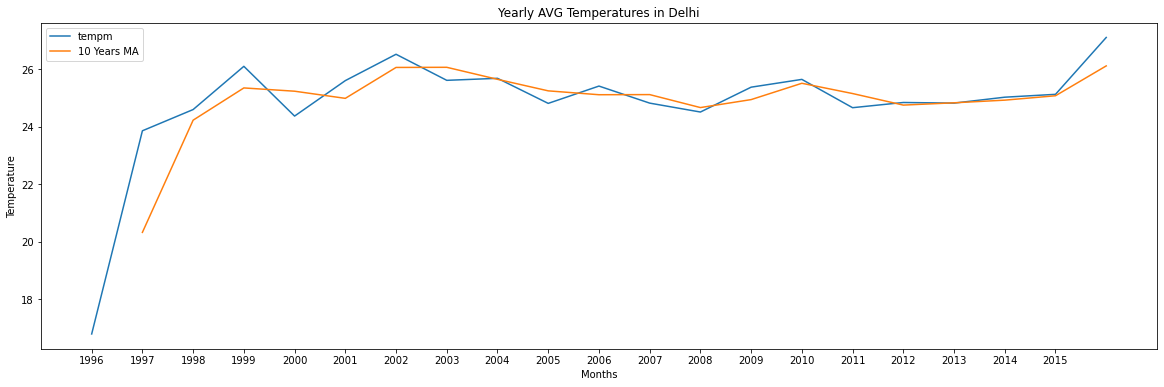

In [23]:
year_avg = pd.pivot_table(dataset_svr, values='tempm', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['tempm'].rolling(2).mean()
year_avg[['tempm','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in Delhi')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1996,2016,1)])
plt.show()

In [24]:
new_india = dataset_svr.groupby('year')['tempm'].mean().reset_index()
new_india.iplot(kind='scatter', x='year', y='tempm', title='Temperature trend in Delhi',
               xTitle='Year', yTitle='Temperature')

In [25]:
year_avg

,tempm,10 Years MA
year,,
1996,16.789936,NaN
1997,23.854387,20.322162
1998,24.592939,24.223663
1999,26.095426,25.344182
2000,24.365561,25.230493
2001,25.598511,24.982036
2002,26.514802,26.056656
2003,25.608446,26.061624
2004,25.678487,25.643467


In [26]:
dataset_svr.drop("tempm",inplace=True,axis=1)

In [27]:
dataset_svr.columns

Index(['hum', 'pressurem', 'wspdm', 'day', 'month', 'year'], dtype='object')

In [28]:
X=dataset_svr.iloc[:,:].values
X.shape

(7366, 6)

In [29]:
y=y.values
y.shape

(7366,)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [32]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (4935, 6)
Shape of X_test (2431, 6)
Shape of y_train (4935,)
Shape of y_test (2431,)


In [33]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
X_train=sc_X.fit_transform(X_train)
y_train=np.array(y_train).reshape(-1,1)
y_train=sc_Y.fit_transform(y_train)
# y_train=np.array(y_train).reshape(-1,1)

In [34]:
from sklearn.svm import SVR

In [35]:
regressor = SVR(kernel = 'rbf')

In [36]:
regressor.fit(X_train,y_train.ravel())

SVR()

In [37]:
X_test=sc_X.fit_transform(X_test)
y_pred=regressor.predict(X_test)

In [38]:
y_pred=sc_Y.inverse_transform(y_pred)
y_pred

array([28.86631792, 33.19620759, 20.17374287, ..., 14.63009079,
       32.95245274, 15.7592242 ])

In [39]:
y_test

array([28.875     , 32.5       , 24.75      , ..., 19.52173913,
       32.875     , 14.71428571])

In [40]:
# Accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'{mse} {mae} {r2}')

2.016785599986925 1.5070164620845155 0.9240828189141441


In [41]:
y_1=y_test[:70]
y_2=y_pred[:70]

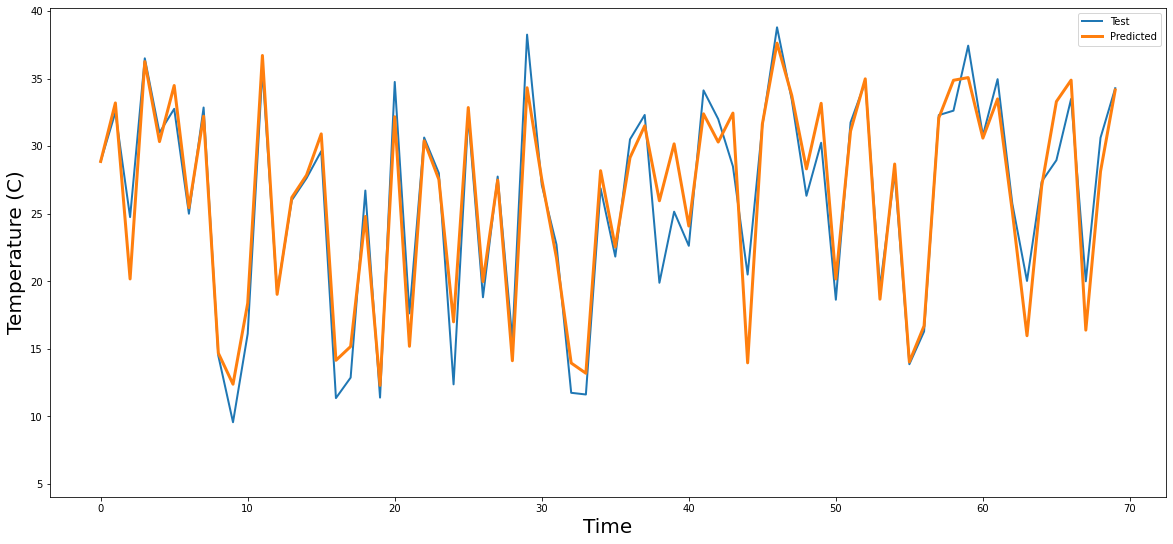

In [50]:
scale_factor=0.5
plt.figure(figsize=(20,9))
plt.plot(y_1,linewidth=2)
plt.plot(y_2,linewidth=3)
ymin,ymax=plt.ylim()
plt.ylim(ymin * scale_factor, ymax)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','Predicted'))
plt.savefig('Plots/SVR.png')
plt.show()

In [51]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,28.875000,28.866318
1,32.500000,33.196208
2,24.750000,20.173743
3,36.500000,36.255789
4,31.000000,30.334390
...,...,...
2426,35.000000,36.163971
2427,15.142857,19.141472
2428,19.521739,14.630091
2429,32.875000,32.952453


In [53]:
test=pd.read_csv("archive/DailyDelhiClimateTrain.csv")

In [54]:
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [55]:
def extract_year(value):
    return (value[0:4])

def extract_month(value):
    return (value[5:7])

def extract_date(value):
    return (value[8:10])

In [56]:
test["year"]=test["date"].apply(lambda x : extract_year(x))
test["month"]=test["date"].apply(lambda x : extract_month(x))
test["dat"]=test["date"].apply(lambda x : extract_date(x))
test

,date,meantemp,humidity,wind_speed,meanpressure,year,month,dat
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,01,01
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,01,02
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,01,03
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,01,04
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,01,05
...,...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12,28
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12,29
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12,30
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12,31


In [57]:
pred=test['meantemp']
pred

0       10.000000
1        7.400000
2        7.166667
3        8.666667
4        6.000000
          ...    
1457    17.217391
1458    15.238095
1459    14.095238
1460    15.052632
1461    10.000000
Name: meantemp, Length: 1462, dtype: float64

In [58]:
test.drop('meantemp',inplace=True,axis=1)
test.drop('date',inplace=True,axis=1)
# test.drop('meanpressure',inplace=True,axis=1)
test

,humidity,wind_speed,meanpressure,year,month,dat
0,84.500000,0.000000,1015.666667,2013,01,01
1,92.000000,2.980000,1017.800000,2013,01,02
2,87.000000,4.633333,1018.666667,2013,01,03
3,71.333333,1.233333,1017.166667,2013,01,04
4,86.833333,3.700000,1016.500000,2013,01,05
...,...,...,...,...,...,...
1457,68.043478,3.547826,1015.565217,2016,12,28
1458,87.857143,6.000000,1016.904762,2016,12,29
1459,89.666667,6.266667,1017.904762,2016,12,30
1460,87.000000,7.325000,1016.100000,2016,12,31


In [59]:
X=test.iloc[:,:].values
X.shape

(1462, 6)

In [60]:
X=sc_X.fit_transform(X)

In [61]:
X

array([[ 1.41543887, -1.49169876,  0.02532119, -1.34189091, -1.599501  ,
        -1.67163147],
       [ 1.86282836, -0.83819598,  0.03716186, -1.34189091, -1.599501  ,
        -1.55806617],
       [ 1.5645687 , -0.47562621,  0.04197213, -1.34189091, -1.599501  ,
        -1.44450087],
       ...,
       [ 1.72364052, -0.11744236,  0.03774332,  1.33700464,  1.58840024,
         1.62176217],
       [ 1.5645687 ,  0.11464615,  0.02772632,  1.33700464,  1.58840024,
         1.73532746],
       [ 2.34004383, -1.49169876,  0.02717129,  2.22996982, -1.599501  ,
        -1.67163147]])

In [62]:
pred=pred.values
pred.shape

(1462,)

In [63]:
y_pred=regressor.predict(X)

In [64]:
y_pred=sc_Y.inverse_transform(y_pred)
y_pred

array([12.83715148, 12.37970102, 12.04468997, ..., 14.33531699,
       14.70906193, 16.44607455])

In [65]:
pred

array([10.        ,  7.4       ,  7.16666667, ..., 14.0952381 ,
       15.05263158, 10.        ])

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [67]:
mean_absolute_error(y_pred,pred)

2.591619223561901

In [68]:
mean_squared_error(y_pred,pred,squared=False)

3.3996972011079682

In [69]:
r2_score(y_pred,pred)

0.7378103582066518